## Исследование надёжности заёмщиков

Нужно выяснить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеку *pandas*, прочитаем файл *data.csv* и сохраним его в переменной *data*.

In [2]:
# <импорт библиотеки pandas>
import pandas as pd

# <чтение файла с данными с сохранением в data>
data = pd.read_csv('/datasets/data.csv')

Получение первых 10 строк таблицы.

In [4]:
# <получение первых 10 строк таблицы.>
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Общая информация о данных таблицы *data*.

In [5]:
# <общая информация о данных таблицы data>
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


Рассмотрим полученную информацию подробнее.

Всего в таблице 12 столбцов, типы данных у столбцов различаются.

Подробно разберём, какие в *data* столбцы и какую информацию они содержат:

* *children* — количество детей в семье
* *days_employed* — общий трудовой стаж в днях
* *dob_years* — возраст клиента в годах
* *education* — уровень образования клиента
* *education_id* — идентификатор уровня образования
* *family_status* — семейное положение
* *family_status_id* — идентификатор семейного положения
* *gender* — пол клиента
* *income_type* — тип занятости
* *debt* — имел ли задолженность по возврату кредитов
* *total_income* — ежемесячный доход
* *purpose* — цель получения кредита

Количество значений в столбцах различается. Это говорит о том, что в данных есть мусорные значения.

### Вывод

Каждая строка таблицы содержит информацию о клиенте, на основании которой можно оценить способность потенциального заёмщика вернуть кредит банку. Проблемы которые видны даже на небольшом срезе данных: пропуски, аномальные значения, отрицательные значения общего трудового стажа в днях (возникшие из-за способа заполнения таблицы данными, скорее всего), различный регистр в столбце education, необходимость лемматизации для того чтобы одна и та же цель кредита не была представлена в таблице разными значениями.

### Шаг 2. Предобработка данных

### Обработка дубликатов

Проверим количество дубликатов до того как мы поправим регистр в столбце *education*:

In [6]:
# <проверим количество полных дубликатов>
data.duplicated().sum()

54

Поправим регистр:

In [7]:
# <проверим какие у нас есть уровни образования>
print(data['education'].value_counts())
# <понизим регистр у всех строк в столбце>
data['education'] = data['education'].str.lower()
# <проверим какие у нас есть уровни образования снова>
print('')
print(data['education'].value_counts())

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


Подсчитаем количество дубликатов, а также предположим какой общий признак имеют дубликаты:

In [8]:
# <проверим количество полных дубликатов>
print(data.duplicated().sum())
print('')

# <импортируем библиотеку для функции isnan>
import math

# <проверим имеют ли дубликаты общий признак>
count_nan = 0 
for row in data.duplicated()[data.duplicated() != False].index:
    if math.isnan(data.loc[row,'days_employed']) and math.isnan(data.loc[row,'total_income']):
        count_nan += 1
print('Количество дубликатов которые имеют NaN в "days_employed" и "total_income":' , count_nan)

71

Количество дубликатов которые имеют NaN в "days_employed" и "total_income": 71


Количество дубликатов стало больше после исправления регистра, значит 17 дубликатов имели просто другой регистр в столбце *education*. А также мы выяснили что у всех дубликатов общий признак, отсутствуют данные в столбцах *days_employed* и  *total_income*. Поправим столбец *children*:

In [9]:
# <применим метод value_counts() к столбцу children>
print(data['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


Вообще не иметь детей, или иметь от одного до пяти детей - это нормально. Иметь отрицательное число детей, а также 76 клиентов с 20 детьми - это явно не из нашей Вселенной.
С отрицательным значением поступим просто - предоположим что это была ошибка ввода, а форма для ввода была несовершенна для предупреждения пользователя. Сделаем эти значения положительными.

In [10]:
# <заменим все значения "-1" на "1" в столбце children>
data[data['children'] == -1] = data[data['children'] == -1].replace(-1,1)

# <проверим что заемщиков с одним ребенком теперь ровно на 47 больше>
print(data['children'].value_counts())

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64


По поводу 20 детей можно развести много дискуссий, но наиболее подходящими вариантами решения проблемы выглядят три:
* Это была ошибка ввода, и скорее всего имелось ввиду 2 ребенка.
* Можно заменить это значение медианой.
* Можно оставить его как есть.

Отметем третий вариант так как маловероятно что заемщиков с 20 детьми будет больше чем с 4-мя.
Чтобы выбрать между 1 и 2 вариантом посчитаем медиану и среднее, но при этом без 76 значений где у заемщиков 20 детей.

In [11]:
#<подсчитаем среднее>
print('Среднее:', data[data['children'] != 20]['children'].mean())

#<подсчитаем медиану>
children_median = data[data['children'] != 20]['children'].median()
print('Медиана:', children_median)

Среднее: 0.474334467807357
Медиана: 0.0


Учитывая уроки в спринте, наиболее правильным будет заменить все значения '20' на медиану.

In [12]:
# <добавим библиотеку numpy для удобной функции замены с условием>
import numpy as np

# <замена с условием>
data['children'] = np.where((data.children == 20),children_median,data.children)

Подсчитаем количество дубликатов:

In [13]:
# <проверим количество полных дубликатов>
data.duplicated().sum()

71

Поправленный столбец *children* не повлиял на количество дубликатов. Удалим дубликаты:

In [14]:
# <удаление дубликатов методом drop_duplicates()>
data = data.drop_duplicates().reset_index(drop = True)
# <проверим количество полных дубликатов>
data.duplicated().sum()

0

К выявлению дубликатов мы еще можем вернуться в течение проекта.

### Вывод

Мы выявили дубликаты и удалили их, используя для полных дубликатов drop_duplicates(). Предварительно поправили регистр. Выяснили общий признак, присущий этим дубликатам(*NaN* в столбцах *days_employed* и  *total_income*). Могу сделать предположение, всего лишь одно из возможных, что появление дубликатов и *NaN* связано с ошибками ввода или передачи данных. Дубликаты могли образоваться из повторной попытки заполнить таблицу корректными значениями. После лемматизации попробуем снова отыскать дубликаты.

### Обработка пропусков

Подсчитаем количество пропусков в столбце *days_employed* и *total_income*:

In [15]:
# <подсчитаем количество пропусков в столбце days_employed>
print(data[data['days_employed'].isna() != False].count())

print('')

# <подсчитаем количество пропусков в столбце total_income>
print(data[data['total_income'].isna() != False].count())

print('')

# <проверим одни и те же ли это строки>
count_nan_in_data = 0 
for row in data.index:
    if math.isnan(data.loc[row,'days_employed']) and math.isnan(data.loc[row,'total_income']):
        count_nan_in_data += 1
print('Количество строк которые имеют NaN в "days_employed" и "total_income":' , count_nan_in_data)

children            2103
days_employed          0
dob_years           2103
education           2103
education_id        2103
family_status       2103
family_status_id    2103
gender              2103
income_type         2103
debt                2103
total_income           0
purpose             2103
dtype: int64

children            2103
days_employed          0
dob_years           2103
education           2103
education_id        2103
family_status       2103
family_status_id    2103
gender              2103
income_type         2103
debt                2103
total_income           0
purpose             2103
dtype: int64

Количество строк которые имеют NaN в "days_employed" и "total_income": 2103


Одни и те же. Занесем их в отдельную переменную и посмотрим на них.

In [16]:
# <Занесем в отдельную переменную>
nan_data = data[data['days_employed'].isnull()]
# <Проверим какие типы дохода у подобных заемщиков>
print(nan_data['income_type'].value_counts())
print('')
# <Проверим какое образование у подобных заемщиков>
print(nan_data['education'].value_counts())

сотрудник          1070
компаньон           501
пенсионер           386
госслужащий         145
предприниматель       1
Name: income_type, dtype: int64

среднее                1479
высшее                  534
неоконченное высшее      69
начальное                21
Name: education, dtype: int64


Не выйдет выделить какой-то паттерн. Возможные причины появления пропусков в данных:
* Часть данных является отдельным блоком (2103 значения), и значения столбцов *days_employed* и *total_income* были преобразованы при конвертации файла из одного формата в другой, затем этими данными была заполнена основная таблица.
* Данные были искажены (специально).

По поводу заполнения пропусков были следующие идеи: учитывать тип дохода и возраст, соответственно подсчитать для категорий например 18-58 лет/сотрудник  медиану/среднее, и далее заполнять пропущенные значения для каждой группы. Но в рамках данного проекта и учитывая мой опыт попробуем обойтись только подсчетом медианы/среднего для разных типов дохода. НО: предварительно проверим аномальные данные в столбцах *days_empolyed* и *total_income*.

Столбец *days_empolyed*, в первых же 10 значениях можно обнаружить аномальное значение, а также тот факт что все не аномальные значения отрицательны.
Подправим отрицательные значения:

In [17]:
# <используем функцию abs() для изменения знака отрицательных значений>
data['days_employed'] = data['days_employed'].abs()

Прежде всего меня заинтересовало как можно избавиться от значений таких как 340266.072047 в 5 ячейке. В переводе на года это около 932 лет(без выходных). Даже если предположить что это часы - получается около 116 лет стажа(без выходных). Мне тяжело представить причину этой аномалии.
Я предположил что максимальный трудовой стаж 60 лет, и затратил минимальное количество времени на поиск этой информации, на этом сайте http://www.pfrf.ru/eservices/calc/, калькуляторе пенсии, невозможно ввести трудовой стаж выше 60 лет. Условимся что это легитимно.
Давайте посмотрим какие еще есть аномалии в этом столбце:

In [18]:
# <подсчитаем количество аномалий в столбце days_employed, 
# тут предположим что у человека трудовой стаж 60 лет и он работал с выходными>
print(data[data['days_employed'] > 15700]['days_employed'].count())

# <тут предположим что у человека трудовой стаж 60 лет и он работал без выходных>
print(data[data['days_employed'] > 21900]['days_employed'].count())

# <предположим что такие аномалии наблюдаются в основном у пенсионеров.>
print(data[(data['days_employed'] > 21900) & (data['income_type'] == 'пенсионер')]['days_employed'].count())

# <Много ли заемщиков с такими аномалиями имеют задолженности>
print(data[(data['days_employed'] > 21900) & (data['income_type'] == 'пенсионер') 
& (data['debt'] == 0)]['days_employed'].count())

3453
3445
3443
3262


Определенная закономерность соблюдается. Очевидно между нормальными и аномальными данными большая пропасть. В подавляющем большинстве случаев такие аномалии у пенсионеров, и чаще всего у них нет задолженностей. Так как точно установить причину аномалии не нахожу возможным, думаю стоит заменить эти данные на медиану или среднее. 

Поищем аномалии в столбце *total_income*:

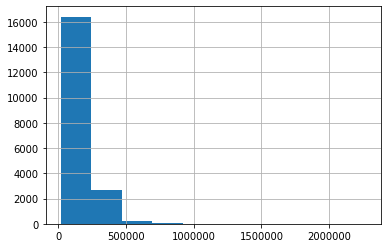

In [19]:
#<используем matplotlib для построения гистограммы, если скомпилировать еще раз, гистограмма отобразится>
import matplotlib.pyplot as plt
%matplotlib inline
data['total_income'].hist()
plt.show()

Все в пределах нормы, люди вполне могут иметь такие зарплаты в реальном мире. Начнем подсчитывать медиану и среднее столбца *days_employed* для каждого типа дохода:

In [20]:
#<подсчитаем среднее для сотрудников>
print('Среднее:', data[(data['days_employed'] < 21900) & (data['income_type'] == 'сотрудник')]['days_employed'].mean())

#<подсчитаем медиану для сотрудников>
employee_median = data[(data['days_employed'] < 21900) & (data['income_type'] == 'сотрудник')]['days_employed'].median()
print('Медиана:', employee_median)

Среднее: 2326.4992159717935
Медиана: 1574.2028211070851


In [21]:
#<подсчитаем среднее для пенсионеров>
print('Среднее:', data[(data['days_employed'] < 21900) & 
(data['income_type'] == 'пенсионер')]['days_employed'].mean())

#<подсчитаем медиану для пенсионеров>
pensioner_median = data[(data['days_employed'] < 21900) & 
(data['income_type'] == 'пенсионер')]['days_employed'].median()
print('Медиана:', pensioner_median)

Среднее: nan
Медиана: nan


Этот результат меня удивил, и я решил проверить что же произошло, неужели отсутствуют пенсионеры без аномальных значений.

In [22]:
# <Какие имеют место быть значения типов дохода среди данных с неаномальными значениями days_employed>
data[data['days_employed'] < 21900]['income_type'].value_counts()

сотрудник          10014
компаньон           4577
госслужащий         1312
предприниматель        1
студент                1
в декрете              1
Name: income_type, dtype: int64

Еще как отсутствуют. Поэтому их аномальные значения и *NaN* мы заменим медианой по всем заемщикам. Также обратим внимание, по заемщикам в декрете, студентам и предпринимателям вычислять медиану мы не будем, среди тех кто имеет адекватный стаж, их всего по единице. Продолжим вычислять медиану, теперь для госслужащих:

In [23]:
#<подсчитаем среднее для госслужащих>
print('Среднее:', data[(data['days_employed'] < 21900) & 
(data['income_type'] == 'госслужащий')]['days_employed'].mean())

#<подсчитаем медиану для госслужащих>
state_employee_median = data[(data['days_employed'] < 21900) & 
(data['income_type'] == 'госслужащий')]['days_employed'].median()
print('Медиана:', state_employee_median)

Среднее: 3399.896901695741
Медиана: 2689.3683533043886


In [24]:
#<подсчитаем среднее для компаньонов>
print('Среднее:', data[(data['days_employed'] < 21900) & 
(data['income_type'] == 'компаньон')]['days_employed'].mean())

#<подсчитаем медиану для компаньонов>
companion_median = data[(data['days_employed'] < 21900) & 
(data['income_type'] == 'компаньон')]['days_employed'].median()
print('Медиана:', companion_median)

Среднее: 2111.5243982977327
Медиана: 1547.3822226779334


Уже много чего сделано, но далеко не все. Для подсчета медианы *days_employed* необходимо скорректировать аномальные значения выше 21900. Для пенсионеров заполним их медианой столбца без аномальных значений (так как найти медиану среди адекватных значений *days_employed* для пенсионеров не представляется возможным, их нет):

In [25]:
# <подсчитаем медиану для пенсионеров>
pensioner_median = data[(data['days_employed'] < 21900) & 
(data['income_type'] != 'пенсионер')]['days_employed'].median()
print('Медиана:', pensioner_median)

# <замена с условием, меняются и аномальные значения и значения NaN>
data['days_employed'] = np.where((data.income_type == 'пенсионер'),pensioner_median,data.days_employed)

Медиана: 1630.0193809778216


Проверим какие у нас еще есть значения в столбце *income_type* и заполним пропущенные и аномальные значения у типов сотрудников которые представлены в таблице очень в малом количестве(у студентов и дамы в декрете все в порядке, я проверил):

In [26]:
# <Проверим какие типы дохода у заемщиков имеют место быть>
print(data['income_type'].value_counts())

сотрудник          11084
компаньон           5078
пенсионер           3829
госслужащий         1457
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64


In [27]:
# <Заполним days_employed безработным>
data[data['income_type'] == 'безработный']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3132,1.0,337524.466835,31,среднее,1,женат / замужем,0,M,безработный,1,59956.991984,покупка жилья для сдачи
14767,0.0,395302.838654,45,высшее,0,гражданский брак,1,F,безработный,0,202722.511368,ремонт жилью


In [28]:
# <Заполним безработным значения days_employed медианой по таблице без аномальных значений>
data['days_employed'] = np.where((data.income_type == 'безработный'),pensioner_median,data.days_employed)

Обращу внимание что теперь у нас нет аномальных значений в этом столбце:

In [29]:
data[data['days_employed'] > 21900].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Продолжим:

In [30]:
# <Заполним days_employed предпринимателям>
data[data['income_type'] == 'предприниматель']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5931,0.0,NaN,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости
18647,0.0,520.848083,27,высшее,0,гражданский брак,1,F,предприниматель,0,499163.144947,на проведение свадьбы


In [31]:
# <Заполним также медианой по таблице без аномальных значений, так как при таком 
# возрасте очевидно человек отработал больше 2 лет>
data['days_employed'] = np.where((data.index == 5931),pensioner_median,data.days_employed)

Заполним значения сотрудникам, компаньонам и госслужащим:

In [32]:
# <Заполним сотрудникам с NaN значения days_employed медианой по сотрудникам без NaN>
data.loc[data.income_type == 'сотрудник','days_employed'] = data[data.income_type == 'сотрудник']['days_employed'].fillna(employee_median)

# <Заполним госслужащим с NaN значения days_employed медианой по госслужащим без NaN>
data.loc[data.income_type == 'госслужащий','days_employed'] = data[data.income_type == 'госслужащий']['days_employed'].fillna(state_employee_median)

# <Заполним компаньонам с NaN значения days_employed медианой по компаньонам без NaN>
data.loc[data.income_type == 'компаньон','days_employed'] = data[data.income_type == 'компаньон']['days_employed'].fillna(companion_median)

Заполним значения *NaN* в столбце *total_income*, по аналогии, только здесь нет аномальных значений:

In [33]:
#<подсчитаем медиану для сотрудников>
employee_income_median = data[data['income_type'] == 'сотрудник']['total_income'].median()
print('Медиана доходов сотрудников:', employee_income_median)

#<подсчитаем медиану для госслужащих>
state_employee_income_median = data[data['income_type'] == 'госслужащий']['total_income'].median()
print('Медиана доходов госслужащих:', state_employee_income_median)

#<подсчитаем медиану для компаньонов>
companion_income_median = data[data['income_type'] == 'компаньон']['total_income'].median()
print('Медиана доходов компаньонов:', companion_income_median)

#<подсчитаем медиану для пенсионеров>
pensioner_income_median = data[data['income_type'] == 'пенсионер']['total_income'].median()
print('Медиана доходов пенсионеров:', pensioner_income_median)

# <Заполним сотрудникам с NaN значения total_income медианой по сотрудникам без NaN>
data.loc[data.income_type == 'сотрудник','total_income'] = data[data.income_type == 'сотрудник']['total_income'].fillna(employee_income_median)

# <Заполним госслужащим с NaN значения total_income медианой по госслужащим без NaN>
data.loc[data.income_type == 'госслужащий','total_income'] = data[data.income_type == 'госслужащий']['total_income'].fillna(state_employee_income_median)

# <Заполним компаньонам с NaN значения total_income медианой по компаньонам без NaN>
data.loc[data.income_type == 'компаньон','total_income'] = data[data.income_type == 'компаньон']['total_income'].fillna(companion_income_median)

# <Заполним сотрудникам с NaN значения total_income медианой по пенсионерам без NaN>
data.loc[data.income_type == 'пенсионер','total_income'] = data[data.income_type == 'пенсионер']['total_income'].fillna(pensioner_income_median)

# <Проставим предпринимателю с NaN значение total_income как у другого предпринимателя, их всего два.>
data['total_income'] = np.where((data.index == 5931),data.loc[18647,'total_income'],data.total_income)

# <Проверим наличие NaN>
print(data[data['total_income'].isna() != False].count())

Медиана доходов сотрудников: 142594.39684740017
Медиана доходов госслужащих: 150447.9352830068
Медиана доходов компаньонов: 172357.95096577113
Медиана доходов пенсионеров: 118514.48641164352
children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


Проверим все ли значения в порядке в столбце *dob_years*:

In [34]:
# <получим array со всеми уникальными значениями столбца>
data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

Есть проблема с возрастом 0. Попробуем проставить тут средний возраст, разный для пенсионеров и остальных.

In [35]:
#<подсчитаем средний возраст пенсионера>
pensioner_age_mean = data[data['income_type'] == 'пенсионер']['dob_years'].mean()
pensioner_age_mean = int(round(pensioner_age_mean))
print('Средний возраст пенсионера:', pensioner_age_mean)

#<подсчитаем средний возраст непенсионера>
non_pensioner_age_mean = data[data['income_type'] != 'пенсионер']['dob_years'].mean()
non_pensioner_age_mean = int(round(non_pensioner_age_mean))
print('Средний возраст непенсионера:', non_pensioner_age_mean)

#<Заменим 0 на средний возраст пенсионера>
data['dob_years'] = np.where((data.dob_years == 0) & (data.income_type == 'пенсионер'),pensioner_age_mean,data.dob_years)

#<Заменим 0 на средний возраст непенсионера>
data['dob_years'] = np.where((data.dob_years == 0) & (data.income_type != 'пенсионер'),non_pensioner_age_mean,data.dob_years)

Средний возраст пенсионера: 59
Средний возраст непенсионера: 40


Проверим все ли в порядке с полами в столбце *gender*:

In [36]:
# <получим array со всеми уникальными значениями столбца>
data['gender'].value_counts()

F      14174
M       7279
XNA        1
Name: gender, dtype: int64

Имеет место быть неизвестный пол. Поиски в интернете привели лишь к тому что это название фреймворка. Так как вопросы поставленные перед нами в этом задании не требует анализа отталкиваясь от пола и значение всего лишь одно, я его оставлю. Возможная причина появления этого значения в данных: ошибка ввода (виновен пользователь CRM), обозначения пола принятые в опр. системе (кто знает может это данные из "разнообразной" страны), возможно мы имеем дело с тестовыми данными.
Значение оставлю, так как в остальном эта строка адекватна, а значит имеет полное право влиять на мои выводы в конце проекта.

In [37]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10684,0.0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


In [38]:
# <общая информация о данных таблицы data>
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
children            21454 non-null float64
days_employed       21454 non-null float64
dob_years           21454 non-null int64
education           21454 non-null object
education_id        21454 non-null int64
family_status       21454 non-null object
family_status_id    21454 non-null int64
gender              21454 non-null object
income_type         21454 non-null object
debt                21454 non-null int64
total_income        21454 non-null float64
purpose             21454 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB
None


### Вывод

Пропусков больше нет, после прохождения дедубликации у нас на 71 значение меньше. Мы заполнили пропуски медианой по каждому типу дохода, это вполне легитимно, учитывая что в рамках курса мы еще не дошли до более интересных способов замены пропусков.
Из интересного - аномальные значения отработанных дней встречаются у пенсионеров, возможно это связано с тем что у них их очень много(должно быть), возможно это какая-то бюрократическая ошибка + ошибка пользователя + несовершенность CRM-системы + ошибка формата. Имеется нулевой возраст в некоторых данных, если он вычислялся в системе, он мог стать таким и по причине ошибки пользователя, и из-за состояния системы в конкретный момент ввода данных и выгрузки этих данных. По полу возможные причины описаны выше, перед выводом.

### Замена типа данных

Еще раз посмотрим информацию о нашей таблице:

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
children            21454 non-null float64
days_employed       21454 non-null float64
dob_years           21454 non-null int64
education           21454 non-null object
education_id        21454 non-null int64
family_status       21454 non-null object
family_status_id    21454 non-null int64
gender              21454 non-null object
income_type         21454 non-null object
debt                21454 non-null int64
total_income        21454 non-null float64
purpose             21454 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


Количество детей, возраст клиента в годах, идентификатор уровня образования, идентификатор семейного положения, имел ли задолженность по возврату кредитов - целые числа тут подходят идеально. Всем остальным категориям формат тоже подходит, кроме *days_employed*, *total_income* и *children*.

Преобразуем вещественные значения из столбцов *days_employed*, *total_income* и *children* в целочисленные. Сделаем это потому что отработанные дни и количество детей должны быть представлены целым числом, а в остальном сделаем это для уменьшения веса таблицы и для того чтобы визуально она выглядела лучше. Используем метод astype('int'), в спринте для данных преобразований был указан именно этот метод.

In [40]:
data['days_employed'] = data['days_employed'].astype('int')

data['children'] = data['children'].astype('int')

data['total_income'] = data['total_income'].astype('int')

# <проверим результаты>
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
children            21454 non-null int64
days_employed       21454 non-null int64
dob_years           21454 non-null int64
education           21454 non-null object
education_id        21454 non-null int64
family_status       21454 non-null object
family_status_id    21454 non-null int64
gender              21454 non-null object
income_type         21454 non-null object
debt                21454 non-null int64
total_income        21454 non-null int64
purpose             21454 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


Проверим не появились ли дубликаты в процессе обработки пропусков.

In [41]:
# <проверим количество полных дубликатов>
data.duplicated().sum()

0

Все в порядке. Проверим результаты:

In [42]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,1630,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Вывод

Мы определили какие столбцы требует замены типа данных, и использовали для этого единственный доступный нам метод для перевода вещественных чисел в целые (из учебного курса). Идем дальше.

### Лемматизация

Необходимо уменьшить вариативность целей кредита, так как многие вариации (покупка жилья, покупка жилья для семьи) можно выразить одним названием цели кредита. Начнем с того что выделим наиболее популярные леммы:

In [44]:
# <Импотируем pymystem3:>
from pymystem3 import Mystem
m = Mystem()

# <вызываем специальный контейнер Counter из модуля collections>
from collections import Counter

# <создаем счетчик лемм>
count_lemmas = Counter()

# <Пополняем счетчик лемм леммами из каждой строки столбца purpose>
for row in range(data.shape[0]):
    lemmas = m.lemmatize(data['purpose'][row])
    count_lemmas += Counter(lemmas)

# <наиболее популярные леммы>    
count_lemmas

Counter({'покупка': 5897,
         ' ': 33570,
         'жилье': 4460,
         '\n': 21454,
         'приобретение': 461,
         'автомобиль': 4306,
         'дополнительный': 906,
         'образование': 4013,
         'сыграть': 765,
         'свадьба': 2324,
         'операция': 2604,
         'с': 2918,
         'на': 2222,
         'проведение': 768,
         'для': 1289,
         'семья': 638,
         'недвижимость': 6351,
         'коммерческий': 1311,
         'жилой': 1230,
         'строительство': 1878,
         'собственный': 635,
         'подержать': 478,
         'свой': 2230,
         'со': 627,
         'заниматься': 904,
         'сделка': 941,
         'подержанный': 486,
         'получение': 1314,
         'высокий': 1374,
         'профильный': 436,
         'сдача': 651,
         'ремонт': 607})

Выделим типы целей кредита. Для этого мне в том числе понадобилось посмотреть таблицу целиком.
* Операции с коммерческой недвижимостью, их стоит выделить отдельно, это бизнес, это не жилье. Их количество должно быть предположительно равно 1311 судя по нашему счетчику.
* Сделка с автомобилем, предполагаемое количество 4306.
* Образование, предполагаемое количество 4013.
* Строительство, предполагаемое количество 1878.
* Свадьба, предполагаемое количество 2324.
* Ремонт, предполагаемое количество 607.
* Операции с некоммерческой недвижимостью/жильем, предполагаемое количество 21424 - все типы = 7015.

Снова пройдемся по всей таблице и теперь будем менять каждое значение цели кредита в зависимости от найденных лемм:

In [45]:
# <Пройдемся циклом по столбцу purpose, если встречаем необходимую лемму в значении то меняем его на новое, стандартизированное>
for row in range(data.shape[0]):
    lemmas = m.lemmatize(data['purpose'][row])
    if 'коммерческий' in lemmas:
        data.loc[row, 'purpose'] = 'Операции с коммерческой недвижимостью'
    elif 'автомобиль' in lemmas:
        data.loc[row, 'purpose']  = 'Сделка с автомобилем'
    elif 'свадьба' in lemmas:
        data.loc[row, 'purpose']  = 'Свадьба'
    elif 'образование' in lemmas:
        data.loc[row, 'purpose']  = 'Образование'
    elif 'строительство' in lemmas:
        data.loc[row, 'purpose']  = 'Строительство'
    elif 'ремонт' in lemmas:
        data.loc[row, 'purpose']  = 'Ремонт'
    else:
        data.loc[row, 'purpose']  = 'Операции с некоммерческой недвижимостью/жильем'

In [46]:
# <проверим количество типов кредита>
data['purpose'].value_counts()

Операции с некоммерческой недвижимостью/жильем    7015
Сделка с автомобилем                              4306
Образование                                       4013
Свадьба                                           2324
Строительство                                     1878
Операции с коммерческой недвижимостью             1311
Ремонт                                             607
Name: purpose, dtype: int64

In [47]:
# <Сравниваем с первыми 10 значениями в начале проекта, сработало верно>
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,Операции с некоммерческой недвижимостью/жильем
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,Сделка с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,Операции с некоммерческой недвижимостью/жильем
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,Образование
4,0,1630,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,Свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,Операции с некоммерческой недвижимостью/жильем
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,Операции с некоммерческой недвижимостью/жильем
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,Образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,Свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,Операции с некоммерческой недвижимостью/жильем


После лемматизации у нас вполне могут появиться дубликаты:

In [48]:
# <проверим количество полных дубликатов после лемматизации>
data.duplicated().sum()

231

Так и есть, что именно с ними делать - вопрос хороший. Изменились только цели кредита в плане названий, но при этом пол, образование, тип дохода и количество детей у этих людей одинаковое, и даже возраст. Это может быть связано с тем что мы проставляли медианы пропускам, и меняли возраст 0 на средний у пенсионеров и непенсионеров. Учитывая сколько параметров совпадают, я принимаю решение удалить эти дубликаты. Если бы не совпадающий возраст, это еще терпимо, но с возрастом вероятность случайного дубликата сильно понижается. Удалим дубликаты:

In [49]:
# <удаление дубликатов методом drop_duplicates()>
data = data.drop_duplicates().reset_index(drop = True)
# <проверим количество полных дубликатов>
data.duplicated().sum()

0

### Вывод

Мы умеем лемматизировать: подсчитали самые популярные леммы, изучили данные, выделили самые популярные категории, и четко указали какие леммы встречаются для подобных категорий. Затем написали цикл, преобразующий столбец *purpose*. Теперь мы точно сможем ответить на вопрос "Как разные цели кредита влияют на его возврат в срок?".

### Категоризация данных

Начнем по порядку, разделим наши данные на категории так, чтобы было проще ответить на вопросы по проекту.
Добавим к таблице столбец *have_children*, отображающий наличие или отсутствие детей:

In [50]:
# <создадим функцию выдающую строки в зависимости от количества детей>
def havechildren(children_amount):
    """
    Возвращает 1 или 0 в зависимости от количества детей, используя правила:
    - 'есть дети', если детей больше 0.
    - 'нет детей', если детей 0.
    """
    if children_amount == 0:
        return 'нет детей'
    return 'есть дети'

# <создадим столбец have_children со значениями есть дети/нет детей>
data['have_children'] = data['children'].apply(havechildren)

# <Проверим результат>
data.loc[:,['children','have_children']].head(10)

,children,have_children
0,1,есть дети
1,1,есть дети
2,0,нет детей
3,3,есть дети
4,0,нет детей
5,0,нет детей
6,0,нет детей
7,0,нет детей
8,2,есть дети
9,0,нет детей


Перейдем к зарплате. Разделим ее на квартили, так мы выявим в каких пределах находится каждая четверть данных о зарплате. Для этого используем метод quantile(): 

In [51]:
# <используем метод quantile() для подсчета квартилей>
data['total_income'].quantile([0.25,0.5,0.75])

0.25    106992.0
0.50    142594.0
0.75    196580.5
Name: total_income, dtype: float64

Добавим к таблице столбец *salary_category*, отображающий размер зарплаты заемщика:

In [52]:
# <создадим функцию выдающую строки в зависимости от количества детей>
def salarycategory(salary):
    """
    Возвращает строки 'менее 106999' или 'от 106999 до 142594' или 'от 142595 до 196561' или 'более 196561' 
    в зависимости от зарплаты.
    """
    if salary > 196561:
        return 'более 196561'
    elif salary > 142595:
        return 'от 142595 до 196561'
    elif salary > 106999:
        return 'от 106999 до 142594'
    return 'менее 106999'

# <создадим столбец have_children со значениями есть дети/нет детей>
data['salary_category'] = data['total_income'].apply(salarycategory)

# <Проверим результат>
data.loc[:,['total_income','salary_category']].head(10)

,total_income,salary_category
0,253875,более 196561
1,112080,от 106999 до 142594
2,145885,от 142595 до 196561
3,267628,более 196561
4,158616,от 142595 до 196561
5,255763,более 196561
6,240525,более 196561
7,135823,от 106999 до 142594
8,95856,менее 106999
9,144425,от 142595 до 196561


### Вывод

Для ответов на вопросы нам необходимо категоризировать следующие столбцы: *children*, *family_status*, *total_income*, *purpose*.
Первый и третий были категоризированы в данном разделе. Семейное положение уже категоризировано. Цели кредита были разделены на адекватное количество категорий в разделе "Лемматизация". Теперь мы можем приступить ответам на вопросы и наглядному представлению результатов с помощью сводных таблиц.

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Для ответа на этот вопрос построим сводную таблицу. 

In [53]:
# <Построим таблицу где сгруппируем наличие задолженности по наличию детей>
data_pivot_children = data.pivot_table(index = ['have_children'], values = 'debt', aggfunc = ['count','sum'])

# <Переименуем строки чтобы была возможность к ним обращаться>
data_pivot_children.set_axis(['count_debt','sum_debt'],axis = 'columns',inplace = True)

# <Подсчитаем процент отсутствия задолженностей для разных категорий заемщиков>
data_pivot_children['return_procent'] = (1 - (data_pivot_children['sum_debt'] / data_pivot_children['count_debt'])) * 100

# <Выведем результаты, в столбце return_procent результат>
data_pivot_children

,count_debt,sum_debt,return_procent
have_children,,,
есть дети,7245,670,90.752243
нет детей,13978,1070,92.345114


Отсутствие детей совсем незначительно повышает вероятность вернуть кредит в срок, в пределах статистической погрешности. Ответ - зависимости нет, наличие детей уменьшает вероятность возврата кредита совсем незначительно.

### Вывод

Мы построили сводную таблицу и сделали вывод что наличие/отсутствие детей слабо влияет на возврат кредита в срок.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для ответа на этот вопрос построим сводную таблицу. 

In [54]:
# <Построим таблицу где сгруппируем наличие задолженности по семейному положению>
data_pivot_family_status = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc = ['count','sum'])

# <Переименуем строки чтобы была возможность к ним обращаться>
data_pivot_family_status.set_axis(['count_debt','sum_debt'],axis = 'columns',inplace = True)

# <Подсчитаем процент отсутствия задолженностей для разных категорий заемщиков>
data_pivot_family_status['return_procent'] = (1 - (data_pivot_family_status['sum_debt'] /
data_pivot_family_status['count_debt'])) * 100

# <Выведем результаты, в столбце return_procent результат>
data_pivot_family_status.sort_values(by = 'return_procent',
ascending = False)

,count_debt,sum_debt,return_procent
family_status,,,
вдовец / вдова,947,63,93.347413
в разводе,1193,85,92.875105
женат / замужем,12163,930,92.353860
гражданский брак,4126,388,90.596219
Не женат / не замужем,2794,274,90.193271


Данные результаты вполне могут послужить для скоринга, но на общее решение выдать кредит или нет - они должны влиять незначительно. Хуже всего среди представленных семейных положений возвращают кредиты "Не женат / не замужем" и "гражданский брак".

### Вывод

Мы построили сводную таблицу и сделали вывод что все семейные положения относительно равны по показателю вероятности возврата кредита в срок. Хуже всего среди представленных семейных положений возвращают кредиты "Не женат / не замужем" и "гражданский брак".

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Для ответа на этот вопрос построим сводную таблицу. 

In [55]:
# <Построим таблицу где сгруппируем наличие задолженности по уровню дохода>
data_pivot_salary_category = data.pivot_table(index = ['salary_category'], values = 'debt', aggfunc = ['count','sum'])

# <Переименуем строки чтобы была возможность к ним обращаться>
data_pivot_salary_category.set_axis(['count_debt','sum_debt'],axis = 'columns',inplace = True)

# <Подсчитаем процент отсутствия задолженностей для разных категорий заемщиков>
data_pivot_salary_category['return_procent'] = (1 - (data_pivot_salary_category['sum_debt'] /
data_pivot_salary_category['count_debt'])) * 100

# <Выведем результаты, в столбце return_procent результат>
data_pivot_salary_category.sort_values(by = 'return_procent',
ascending = False)

,count_debt,sum_debt,return_procent
salary_category,,,
более 196561,5307,377,92.896175
менее 106999,5307,423,92.029395
от 142595 до 196561,5268,454,91.381929
от 106999 до 142594,5341,486,90.900580


### Вывод

Заемщики с зарплатой более 200000 и заемщики с зарплатой менее 100000 возвращают кредиты чаще. Но не намного чаще чем остальные категории зарплат. (ошибки в выражении "не намного" нет)

- Как разные цели кредита влияют на его возврат в срок?

Для ответа на этот вопрос построим сводную таблицу. 

In [56]:
# <Построим таблицу где сгруппируем наличие задолженности по цели кредита>
data_pivot_purpose = data.pivot_table(index = ['purpose'], values = 'debt', aggfunc = ['count','sum'])

# <Переименуем строки чтобы была возможность к ним обращаться>
data_pivot_purpose.set_axis(['count_debt','sum_debt'],axis = 'columns',inplace = True)

# <Подсчитаем процент отсутствия задолженностей для разных категорий заемщиков>
data_pivot_purpose['return_procent'] = (1 - (data_pivot_purpose['sum_debt'] /
data_pivot_purpose['count_debt'])) * 100

# <Выведем результаты, в столбце return_procent результат>
data_pivot_purpose.sort_values(by = 'return_procent',
ascending = False)

,count_debt,sum_debt,return_procent
purpose,,,
Ремонт,607,35,94.233937
Операции с некоммерческой недвижимостью/жильем,6892,504,92.687174
Операции с коммерческой недвижимостью,1311,99,92.448513
Строительство,1871,144,92.303581
Свадьба,2306,186,91.934085
Образование,3964,370,90.665994
Сделка с автомобилем,4272,402,90.589888


### Вывод

Все берем кредиты на ремонт! А также на операции с  жильем/недвижимостью, тут выше процент возврата кредитов. Замечу что по некоторым категориям мало заемщиков, соответственно результаты могут быть нерепрезентативны. Главный вывод: кредит возвращают чаще если он брался на операции с недвижимостью. Если он берется на автомобили или образование, то возвращается реже, но не намного.

### Шаг 4. Общий вывод

Я предполагаю что если речь о кредитах - для банка важно вплоть до процентов точно ли они будут возвращены. Данные которые мы сегодня обработали дают нам понять - определенные цели кредита, размер зарплаты, наличие детей и семейное положение влияют на возврат кредита. А значит банку стоит обращать на них внимание при принятии решения.